In [17]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import geoplot as gplt
import folium

In [18]:
df = gpd.read_file('../website/GeoJSON_Files/plotting1.geojson')

In [3]:
df.drop([0], inplace=True)
df

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,emp_2011,emp_2001,msw_2011,msw_2001,bf_2011,...,msw_change,bf_change,msl_change,fc_change,chh_change,f_emp_change,asset_2001,asset_2011,asset_change,geometry
1,Kupwara,Jammu & Kashmir,1,1,1,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,"POLYGON ((74.60351577029978 34.86906452772406,..."
2,Badgam,Jammu & Kashmir,1,2,2,1.0,1.0,3.0,3.0,1.0,...,2.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,3.0,"POLYGON ((74.82322697657656 34.04904629953776,..."
3,Leh (ladakh),Jammu & Kashmir,1,3,3,3.0,3.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,3.0,"POLYGON ((77.348 32.821, 77.334 32.842, 77.328..."
4,Kargil,Jammu & Kashmir,1,4,4,3.0,3.0,3.0,1.0,3.0,...,3.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,"POLYGON ((76.66039510495222 34.3801152391012, ..."
5,Punch,Jammu & Kashmir,1,5,5,1.0,2.0,1.0,1.0,1.0,...,2.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,"POLYGON ((74.32009096762498 33.95561729464272,..."
6,Rajouri,Jammu & Kashmir,1,6,6,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,3.0,2.0,3.0,1.0,1.0,1.0,2.0,"POLYGON ((74.55452409592628 33.47690504282735,..."
7,Kathua,Jammu & Kashmir,1,7,7,1.0,1.0,3.0,3.0,1.0,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,3.0,"POLYGON ((75.92895428628172 32.75713954981382,..."
8,Baramula,Jammu & Kashmir,1,8,8,1.0,1.0,3.0,1.0,1.0,...,3.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0,3.0,"POLYGON ((74.71388103961665 34.34671047885513,..."
9,Bandipore,Jammu & Kashmir,1,9,9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((75.39241752798466 34.543445300846, 7..."
10,Srinagar,Jammu & Kashmir,1,10,10,3.0,3.0,3.0,3.0,3.0,...,2.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,"POLYGON ((74.71388103961665 34.34671047885513,..."


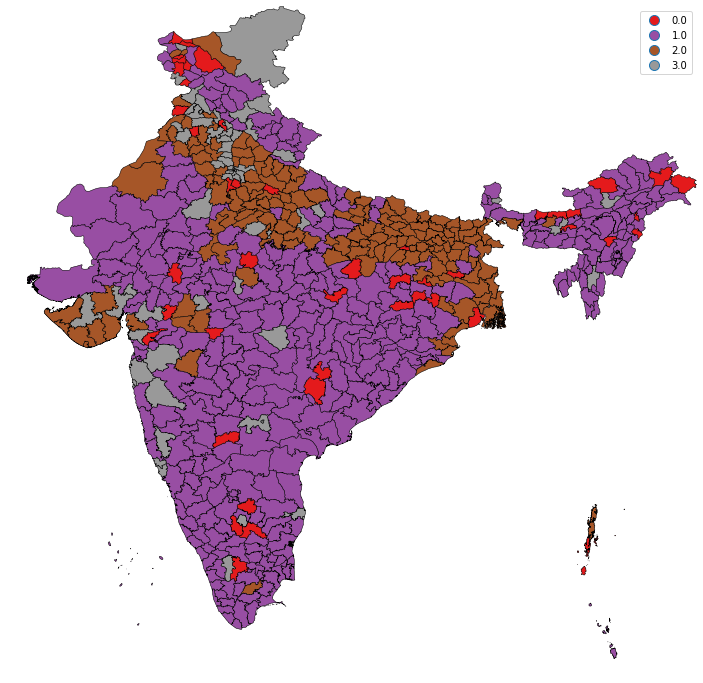

In [23]:
# gplt.polyplot(df)
gplt.choropleth(df1, hue='fc_2001', categorical=True, legend=True, linewidth=0.5, figsize=(12, 12))

In [19]:
df_old_new = pd.read_csv('../website/data/new-districts-2011-census/new-districts-2011-census.csv')
df_industry = pd.read_csv('../website/data/industry-label.csv')
df_industry = df_industry.iloc[:, 3:]
df_industry.columns = ['censuscode', 'industry_2001', 'industry_2011']
df = df.merge(df_industry, on='censuscode', how='outer')
print(df.columns)
# print(df_old_new)
df = df.fillna(0)
for i in df_old_new.index:
    new_district = df_old_new.loc[i, 'new_census_code']
    old_district = df_old_new.loc[i, 'old_census_code']
    df.loc[df['censuscode'] == new_district, 'msl_change'] = df.loc[df['censuscode'] == old_district, 'msl_change'].values[0]
    df.loc[df['censuscode'] == new_district, 'msw_change'] = df.loc[df['censuscode'] == old_district, 'msw_change'].values[0]
    df.loc[df['censuscode'] == new_district, 'asset_change'] = df.loc[df['censuscode'] == old_district, 'asset_change'].values[0]
    df.loc[df['censuscode'] == new_district, 'bf_change'] = df.loc[df['censuscode'] == old_district, 'bf_change'].values[0]
    df.loc[df['censuscode'] == new_district, 'fc_change'] = df.loc[df['censuscode'] == old_district, 'fc_change'].values[0]
    df.loc[df['censuscode'] == new_district, 'fc_2001'] = df.loc[df['censuscode'] == old_district, 'fc_2001'].values[0]
    df.loc[df['censuscode'] == new_district, 'fc_2011'] = df.loc[df['censuscode'] == old_district, 'fc_2011'].values[0]
    df.loc[df['censuscode'] == new_district, 'emp_2001'] = df.loc[df['censuscode'] == old_district, 'emp_2001'].values[0]
    df.loc[df['censuscode'] == new_district, 'emp_2011'] = df.loc[df['censuscode'] == old_district, 'emp_2011'].values[0]
    df.loc[df['censuscode'] == new_district, 'bf_2001'] = df.loc[df['censuscode'] == old_district, 'bf_2001'].values[0]
    df.loc[df['censuscode'] == new_district, 'bf_2011'] = df.loc[df['censuscode'] == old_district, 'bf_2011'].values[0]
    df.loc[df['censuscode'] == new_district, 'chh_2001'] = df.loc[df['censuscode'] == old_district, 'chh_2001'].values[0]
    df.loc[df['censuscode'] == new_district, 'chh_2011'] = df.loc[df['censuscode'] == old_district, 'chh_2011'].values[0]
    df.loc[df['censuscode'] == new_district, 'msl_2001'] = df.loc[df['censuscode'] == old_district, 'msl_2001'].values[0]
    df.loc[df['censuscode'] == new_district, 'msl_2011'] = df.loc[df['censuscode'] == old_district, 'msl_2011'].values[0]
    df.loc[df['censuscode'] == new_district, 'msw_2001'] = df.loc[df['censuscode'] == old_district, 'msw_2001'].values[0]
    df.loc[df['censuscode'] == new_district, 'msw_2011'] = df.loc[df['censuscode'] == old_district, 'msw_2011'].values[0]
    df.loc[df['censuscode'] == new_district, 'asset_2001'] = df.loc[df['censuscode'] == old_district, 'asset_2001'].values[0]
    df.loc[df['censuscode'] == new_district, 'asset_2011'] = df.loc[df['censuscode'] == old_district, 'asset_2011'].values[0]
    df.loc[df['censuscode'] == new_district, 'industry_2001'] = df.loc[df['censuscode'] == old_district, 'industry_2001'].values[0]
    df.loc[df['censuscode'] == new_district, 'industry_2011'] = df.loc[df['censuscode'] == old_district, 'industry_2011'].values[0]

print(sum(np.isnan(df['emp_2001'])))
print(sum(np.isnan(df['emp_2011'])))
print(sum(np.isnan(df['msl_change'])))
print(sum(np.isnan(df['msw_change'])))

Index(['DISTRICT', 'ST_NM', 'ST_CEN_CD', 'DT_CEN_CD', 'censuscode', 'emp_2011',
       'emp_2001', 'msw_2011', 'msw_2001', 'bf_2011', 'bf_2001', 'msl_2011',
       'msl_2001', 'fc_2011', 'fc_2001', 'chh_2011', 'chh_2001', 'f_emp_2001',
       'f_emp_2011', 'emp_change', 'msw_change', 'bf_change', 'msl_change',
       'fc_change', 'chh_change', 'f_emp_change', 'asset_2001', 'asset_2011',
       'asset_change', 'geometry', 'industry_2001', 'industry_2011'],
      dtype='object')
0
0
0
0


In [27]:
import geoplot.crs as gcrs

full_form_dict = {'fc' : 'Fuel for Cooking', 'bf' : 'Bathroom Facility', 'chh' : 'Condition of Household', 'msl' : 'Main Source of Light', 'msw' : 'Main Source of Water', 'asset' : 'Asset Ownership'}

def make_compass_plot(attr):
    proj = gcrs.Mercator()
    df1 = df.fillna(0)
    fig = plt.figure(figsize=(12,18))
    ax = plt.subplot(121, projection=proj)
    gplt.polyplot(df, linewidth=0.25, ax=ax, projection=proj, zorder=-1)
    gplt.choropleth(df1, hue=attr+'_2001', categorical=True, legend=True, legend_labels=['No Data', 'Level-1 ('+str(sum(df[attr+'_2001'] == 1))+')', 'Level-2 ('+str(sum(df[attr+'_2001'] == 2))+')', 'Level-3 ('+str(sum(df[attr+'_2001'] == 3))+')'], cmap='Blues', projection=proj, linewidth=0, ax=ax)
    # gplt.choropleth(df1, hue='fc_2001', categorical=True, cmap='Blues', projection=proj, linewidth=0, ax=ax)
    plt.title(full_form_dict[attr]+" in 2001", fontsize=14, fontweight="bold")

    ax2 = plt.subplot(122, projection=proj)
    gplt.polyplot(df, linewidth=0.25, ax=ax2, projection=proj, zorder=-1)
    gplt.choropleth(df1, hue=attr+'_2011', categorical=True, legend=True, legend_labels=['No Data', 'Level-1 ('+str(sum(df[attr+'_2011'] == 1))+')', 'Level-2 ('+str(sum(df[attr+'_2011'] == 2))+')', 'Level-3 ('+str(sum(df[attr+'_2011'] == 3))+')'], cmap='Blues', projection=proj, linewidth=0, ax=ax2)
    plt.title(full_form_dict[attr]+" in 2011", fontsize=14, fontweight="bold")
    plt.savefig('/Users/sansiddhjain/Studies/MTP/'+attr+'-compass-plot.png')

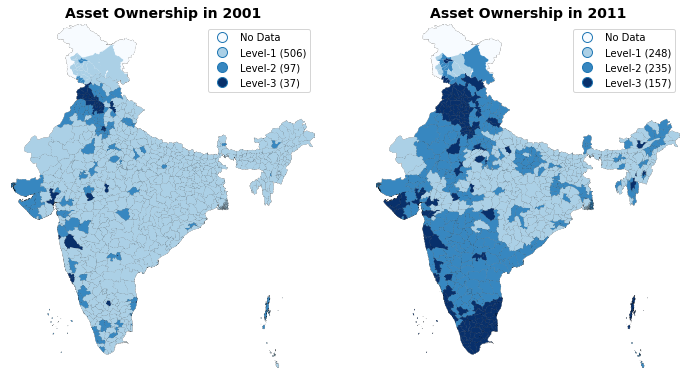

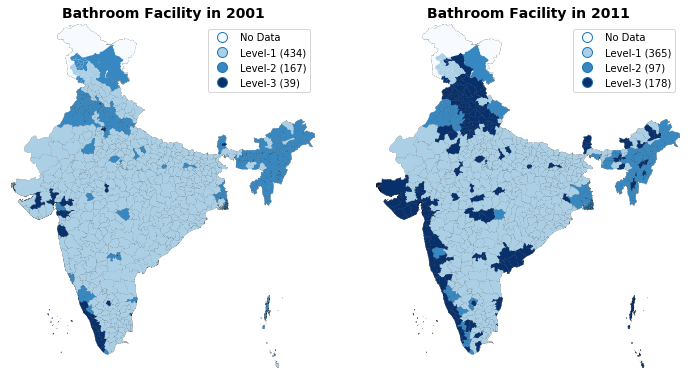

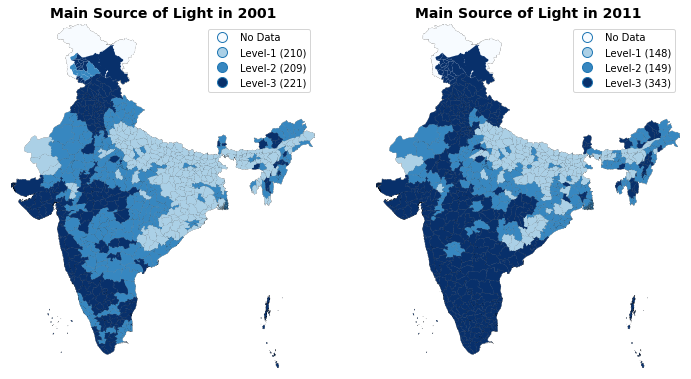

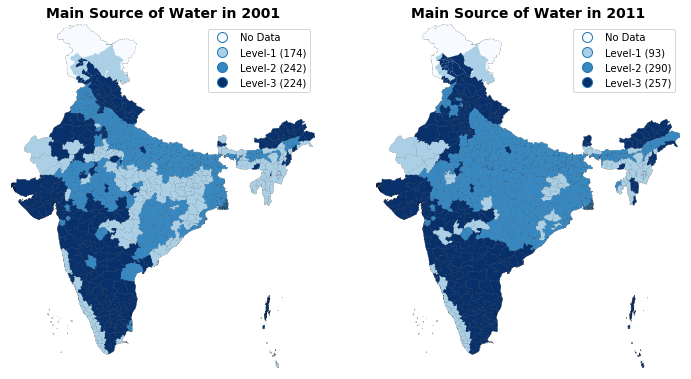

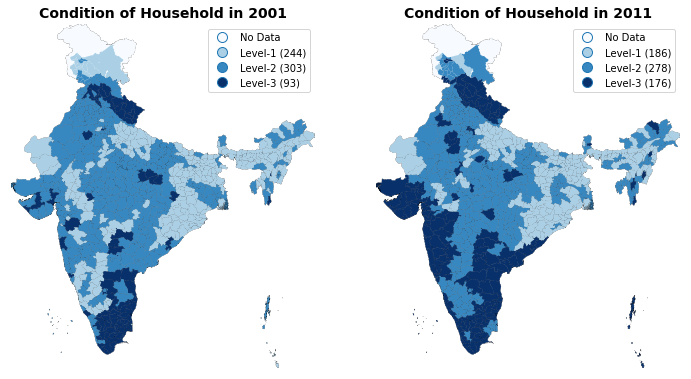

In [28]:
make_compass_plot('asset')
make_compass_plot('bf')
make_compass_plot('msl')
make_compass_plot('msw')
make_compass_plot('chh')

In [8]:
print(sum(df['fc_2001'] == 1))
print(sum(df['fc_2001'] == 2))
print(sum(df['fc_2001'] == 3))

355
163
75


Text(0.5,1,'Main Source of Water')

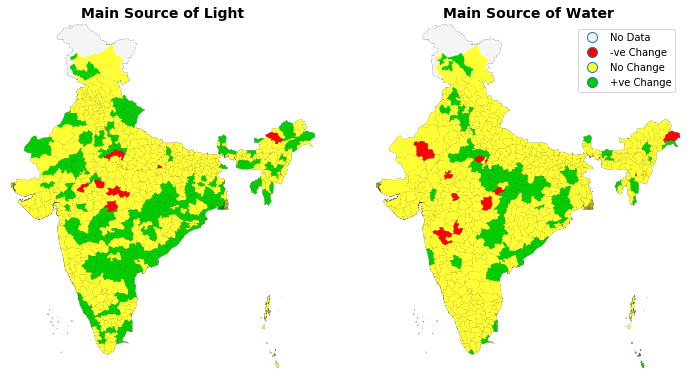

In [24]:
import geoplot.crs as gcrs
import matplotlib

my_cmap = matplotlib.colors.ListedColormap( ['#F5F5F5', '#ff0000', '#FFFF33', '#00CC00'], name='colormap_test')
print(my_cmap)

proj = gcrs.Mercator()
df1 = df.fillna(0)
fig = plt.figure(figsize=(12,18))
ax = plt.subplot(121, projection=proj)
gplt.polyplot(df, linewidth=0.25, ax=ax, projection=proj, zorder=-1)
# gplt.choropleth(df1, hue='emp_2001', categorical=True, legend=True, legend_labels=['No Data', 'High Unemployment', 'Agricultural', 'Non-Agricultural'], cmap='Blues', projection=proj, linewidth=0, ax=ax)
gplt.choropleth(df1, hue='msl_change', categorical=True, cmap=my_cmap, projection=proj, linewidth=0, ax=ax)
# colors = {0:'grey', 1:'red', 2:'yellow', 3:'green'}
# ax.set(c=df1['msl_change'].apply(lambda x: colors[x]))
plt.title("Main Source of Light", fontsize=14, fontweight="bold")

ax2 = plt.subplot(122, projection=proj)
gplt.polyplot(df, linewidth=0.25, ax=ax2, projection=proj, zorder=-1)
gplt.choropleth(df1, hue='msw_change', categorical=True, legend=True, legend_labels=['No Data', '-ve Change', 'No Change', '+ve Change'], cmap=my_cmap, projection=proj, linewidth=0, ax=ax2)
plt.title("Main Source of Water", fontsize=14, fontweight="bold")

Text(0.5,1,'Fuel for Cooking')

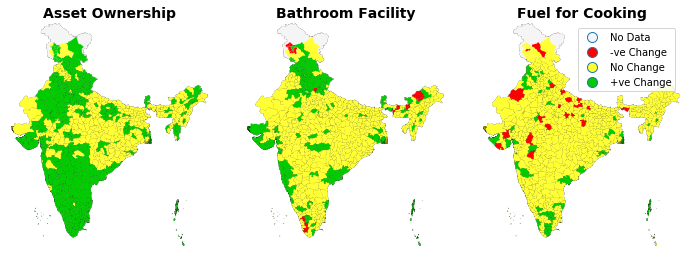

In [30]:
import geoplot.crs as gcrs
import matplotlib

my_cmap = matplotlib.colors.ListedColormap( ['#F5F5F5', '#ff0000', '#FFFF33', '#00CC00'], name='colormap_test')
print(my_cmap)

proj = gcrs.Mercator()
df1 = df.fillna(0)
fig = plt.figure(figsize=(12,27))
ax = plt.subplot(131, projection=proj)
gplt.polyplot(df, linewidth=0.25, ax=ax, projection=proj, zorder=-1)
gplt.choropleth(df1, hue='asset_change', categorical=True, cmap=my_cmap, projection=proj, linewidth=0, ax=ax)
plt.title("Asset Ownership", fontsize=14, fontweight="bold")

ax2 = plt.subplot(132, projection=proj)
gplt.polyplot(df, linewidth=0.25, ax=ax2, projection=proj, zorder=-1)
gplt.choropleth(df1, hue='bf_change', categorical=True, cmap=my_cmap, projection=proj, linewidth=0, ax=ax2)
plt.title("Bathroom Facility", fontsize=14, fontweight="bold")

ax3 = plt.subplot(133, projection=proj)
gplt.polyplot(df, linewidth=0.25, ax=ax3, projection=proj, zorder=-1)
gplt.choropleth(df1, hue='fc_change', categorical=True, cmap=my_cmap, projection=proj, linewidth=0, ax=ax3, legend=True, legend_labels=['No Data', '-ve Change', 'No Change', '+ve Change'])
plt.title("Fuel for Cooking", fontsize=14, fontweight="bold")

In [9]:
plt.cm.get_cmap('Greens', 3)

Text(0.5, 1.0, 'District-wise Industrial Presence in 2011')

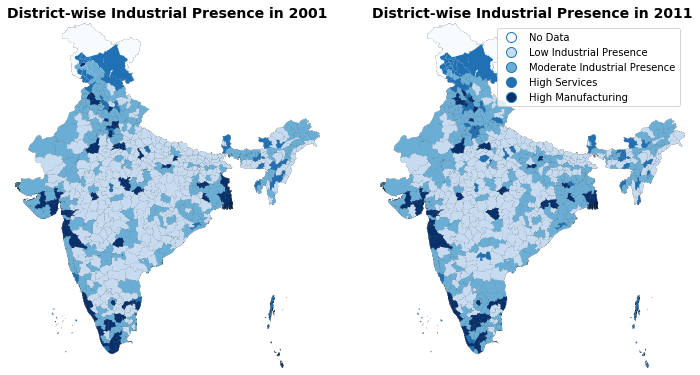

In [7]:
import geoplot.crs as gcrs

proj = gcrs.Mercator()
df1 = df.fillna(0)
fig = plt.figure(figsize=(12,18))
ax = plt.subplot(121, projection=proj)
gplt.polyplot(df, linewidth=0.25, ax=ax, projection=proj, zorder=-1)
# gplt.choropleth(df1, hue='industry_2001', categorical=True, legend=True, legend_labels=['No Data', 'Low Industrial Presence', 'Moderate Industrial Presence', 'High Services Sector', 'High Manufacturing Sector'], cmap='Blues', projection=proj, linewidth=0, ax=ax)
gplt.choropleth(df1, hue='industry_2001', categorical=True, cmap='Blues', projection=proj, linewidth=0, ax=ax)
plt.title("District-wise Industrial Presence in 2001", fontsize=14, fontweight="bold")

ax2 = plt.subplot(122, projection=proj)
gplt.polyplot(df, linewidth=0.25, ax=ax2, projection=proj, zorder=-1)
gplt.choropleth(df1, hue='industry_2011', categorical=True, legend=True, legend_labels=['No Data', 'Low Industrial Presence', 'Moderate Industrial Presence', 'High Services', 'High Manufacturing'], cmap='Blues', projection=proj, linewidth=0, ax=ax2)
plt.title("District-wise Industrial Presence in 2011", fontsize=14, fontweight="bold")

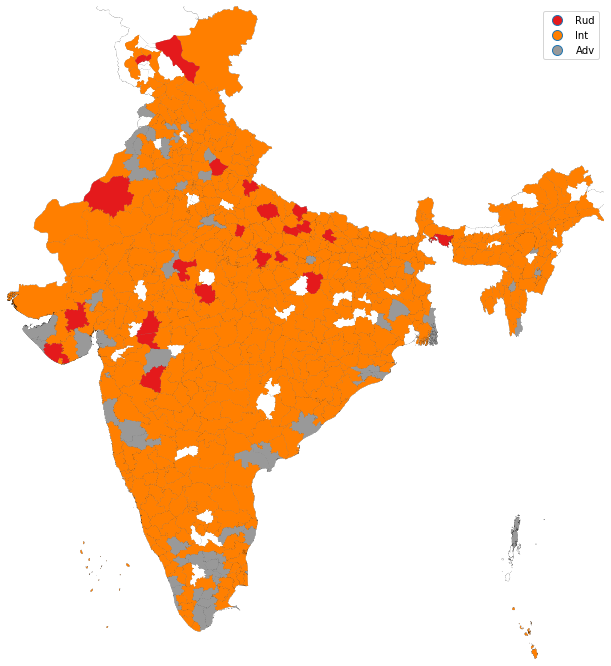

In [44]:
import geoplot.crs as gcrs

proj = gcrs.Mercator()
ax = gplt.polyplot(df, linewidth=0.25, figsize=(12, 12), projection=proj, zorder=-1)
df1 = df[pd.isna(df['fc_change'])]
df1 = df1.fillna(0)
gplt.choropleth(df1, hue='fc_change', categorical=True, cmap='Greys', projection=proj, linewidth=0.25, figsize=(12, 12), ax=ax)
gplt.choropleth(df[np.logical_not(pd.isna(df['fc_change']))], hue='fc_change', categorical=True, legend=True, legend_labels=['Rud', 'Int', 'Adv'], cmap='Set1', projection=proj, linewidth=0, figsize=(12, 12), ax=ax)